## 確認是否使用GPU

In [1]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## 下載 MNIST 資料集, training dataset 有 60000 筆, test dataset 有 10000 筆

In [2]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

train_dataset = dsets.MNIST(root="./data",
                            train = True,
                            transform = transforms.ToTensor(),
                            download = True)

test_dataset = dsets.MNIST(root="./data",
                            train = False,
                            transform = transforms.ToTensor()
                            )

## 設定 Hyperparameters

In [3]:
num_epoch = 10
batch_size = 100
lr = 0.01
num_test_img = 5

## 設定 DataLoader

In [4]:
import torch.utils.data as Data

train_loader = Data.DataLoader(dataset = train_dataset,
                                batch_size = batch_size,
                                shuffle = True
                                )

test_loader = Data.DataLoader(dataset = test_dataset,
                                batch_size = batch_size,
                                shuffle = True
                                )

## 宣告模型類別

In [5]:
import torch.nn as nn

class AutoEncoderCNN(nn.Module):
    def __init__(self):
        super(AutoEncoderCNN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=7, stride=1),
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=7, stride=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=2, stride=2),
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return encoded, decoded

In [5]:
import torch.nn as nn

class AutoEncoderCNN(nn.Module):
    def __init__(self):
        super(AutoEncoderCNN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 7, stride = 1),
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size = 7, stride = 1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size = 2, stride = 2),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size = 2, stride = 2),
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return encoded, decoded


In [6]:
autoencoderCNN = AutoEncoderCNN()
autoencoderCNN.cuda()

AutoEncoderCNN(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=7, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(64, 32, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU()
    (4): ConvTranspose2d(32, 1, kernel_size=(2, 2), stride=(2, 2))
    (5): Sigmoid()
  )
)

# 定義損失函數及優化器

In [7]:
import torch.optim as opt

loss_fn = nn.MSELoss()
optimizer = opt.Adam(autoencoderCNN.parameters(), lr = lr)

## Normalization

In [8]:
from torch.autograd import Variable

view_data = Variable(test_dataset.data[:num_test_img].view(-1, 1, 28, 28).type(torch.cuda.FloatTensor)/255.)

In [9]:
view_data

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
    

## 開始訓練, 每100筆, 把值傳出來看一次. 並且把圖畫出來比較

epoch: 0, loss: 0.2177


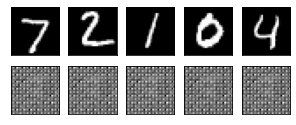

epoch: 0, loss: 0.0532


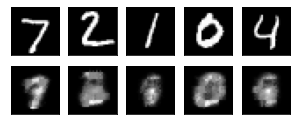

epoch: 0, loss: 0.0292


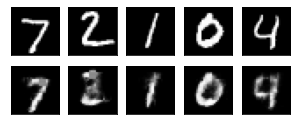

epoch: 0, loss: 0.0242


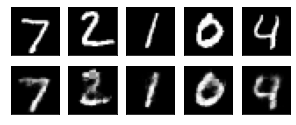

epoch: 0, loss: 0.0181


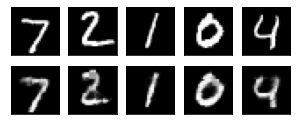

epoch: 0, loss: 0.0195


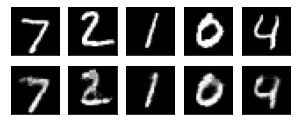

epoch: 1, loss: 0.0173


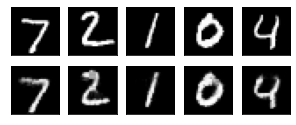

epoch: 1, loss: 0.0153


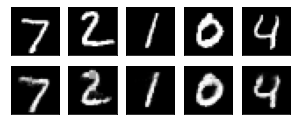

epoch: 1, loss: 0.0153


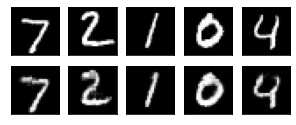

epoch: 1, loss: 0.0137


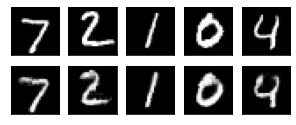

epoch: 1, loss: 0.0144


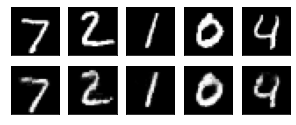

epoch: 1, loss: 0.0128


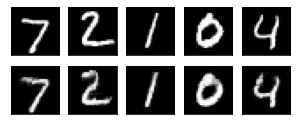

epoch: 2, loss: 0.0127


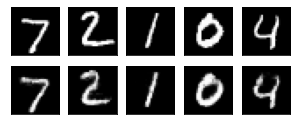

epoch: 2, loss: 0.0119


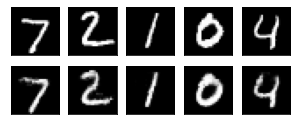

epoch: 2, loss: 0.0126


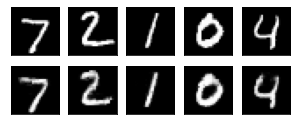

epoch: 2, loss: 0.0128


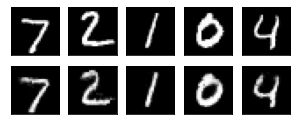

epoch: 2, loss: 0.0117


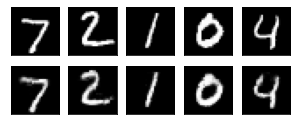

epoch: 2, loss: 0.0120


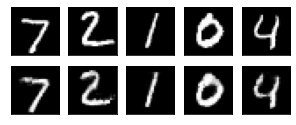

epoch: 3, loss: 0.0124


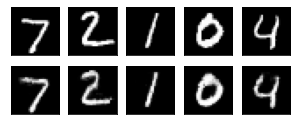

epoch: 3, loss: 0.0109


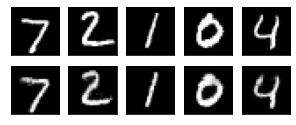

epoch: 3, loss: 0.0103


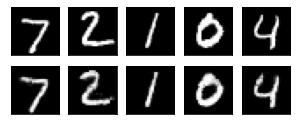

epoch: 3, loss: 0.0120


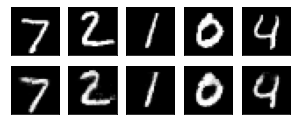

epoch: 3, loss: 0.0094


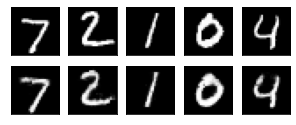

epoch: 3, loss: 0.0105


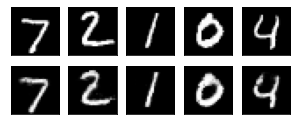

epoch: 4, loss: 0.0100


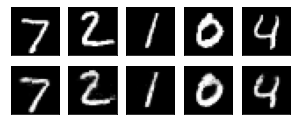

epoch: 4, loss: 0.0107


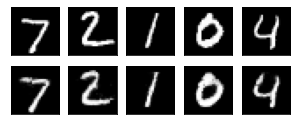

epoch: 4, loss: 0.0102


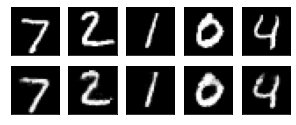

epoch: 4, loss: 0.0105


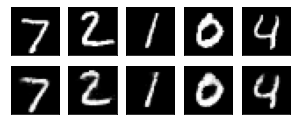

epoch: 4, loss: 0.0108


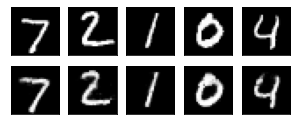

epoch: 4, loss: 0.0104


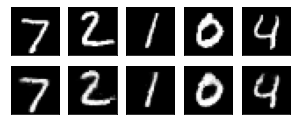

epoch: 5, loss: 0.0098


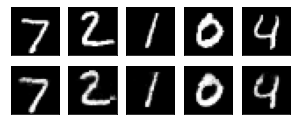

epoch: 5, loss: 0.0096


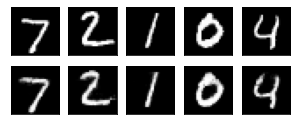

epoch: 5, loss: 0.0101


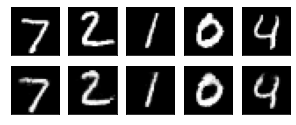

epoch: 5, loss: 0.0103


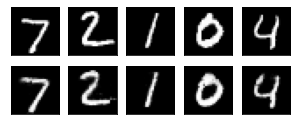

epoch: 5, loss: 0.0093


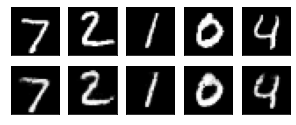

epoch: 5, loss: 0.0102


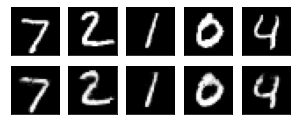

epoch: 6, loss: 0.0097


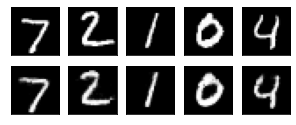

epoch: 6, loss: 0.0095


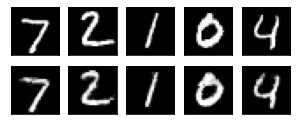

epoch: 6, loss: 0.0094


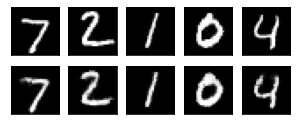

epoch: 6, loss: 0.0090


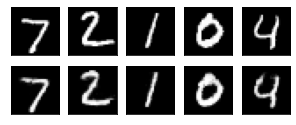

epoch: 6, loss: 0.0098


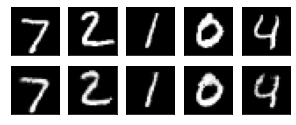

epoch: 6, loss: 0.0097


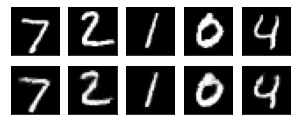

epoch: 7, loss: 0.0090


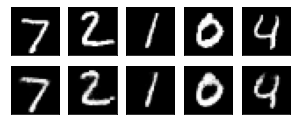

epoch: 7, loss: 0.0101


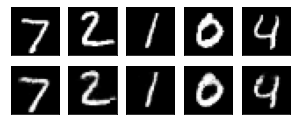

epoch: 7, loss: 0.0100


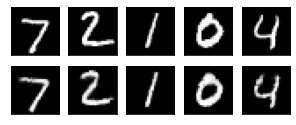

epoch: 7, loss: 0.0099


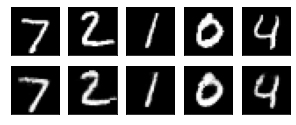

epoch: 7, loss: 0.0102


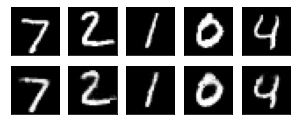

epoch: 7, loss: 0.0096


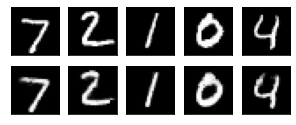

epoch: 8, loss: 0.0078


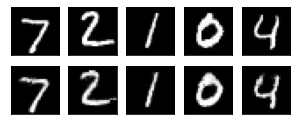

epoch: 8, loss: 0.0096


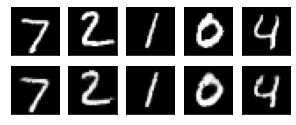

epoch: 8, loss: 0.0093


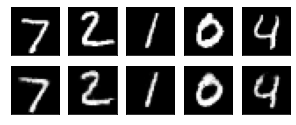

epoch: 8, loss: 0.0091


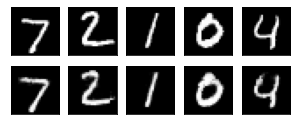

epoch: 8, loss: 0.0089


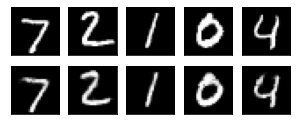

epoch: 8, loss: 0.0084


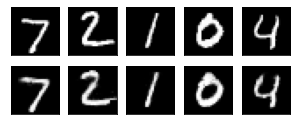

epoch: 9, loss: 0.0090


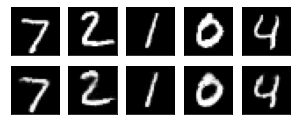

epoch: 9, loss: 0.0094


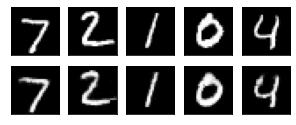

epoch: 9, loss: 0.0088


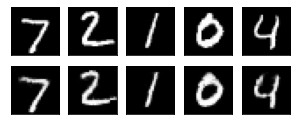

epoch: 9, loss: 0.0089


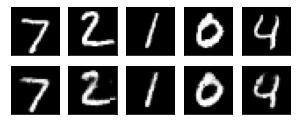

epoch: 9, loss: 0.0083


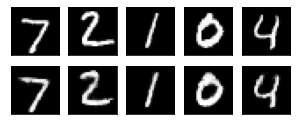

epoch: 9, loss: 0.0099


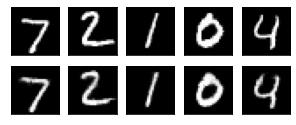

In [9]:
import numpy as np
import matplotlib.pyplot as plt

for epoch in range(num_epoch):
    for i, (x, y) in enumerate(train_loader):
        b_x = Variable(x).cuda()
        b_y = Variable(x).cuda()
        b_labels = Variable(y)

        optimizer.zero_grad()
        encoded, decoded = autoencoderCNN(b_x)
        loss = loss_fn(decoded, b_y)
        loss.backward()
        optimizer.step()

        if i%100 == 0:
            print("epoch: %d, loss: %.4f" %(epoch, loss.data))
            _, decoded_data = autoencoderCNN(view_data)
            f, a = plt.subplots(2, num_test_img, figsize = (5, 2))
            for j in range(num_test_img):
                a[0][j].imshow(np.reshape(view_data.data.cpu().numpy()[j], (28, 28)), cmap = "gray")
                a[0][j].set_xticks(())
                a[0][j].set_yticks(())

                a[1][j].imshow(np.reshape(decoded_data.data.cpu().numpy()[j], (28, 28)), cmap = "gray")
                a[1][j].set_xticks(())
                a[1][j].set_yticks(())
            plt.draw()
            plt.show()